# EDA: Resultados de Conversão Alimentar por Núcleo e Aviário

Análise exploratória de dados (EDA) sobre os resultados de conversão alimentar em diferentes núcleos e aviários. O foco deste estudo é investigar a relação entre a classificação dos aviários (baseada em critérios como capacidade de aquecimento, resfriamento, isolamento e ventilação) e a eficiência da conversão alimentar.

In [198]:
# Bibliotecas
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

A importação dos dados é realizada nas células 4 e 5. A célula 4 estabelece uma conexão com o banco de dados SQLite chamado 'resultado_lotes.db', localizado no diretório '../database/'. A célula 5 executa uma consulta SQL que une as tabelas 'nucleos' e 'resultados' com base na correspondência entre as colunas "Aviário" de 'nucleos' e 'Fazenda' de 'resultados'. A consulta seleciona colunas específicas das duas tabelas, renomeando algumas delas para melhor clareza (por exemplo, "Aviário" para Aviario e "Número do Núcleo" para Núcleo). O resultado da consulta é armazenado em um DataFrame pandas chamado `df`.

In [199]:
# Conexão com banco de dados SQLite
conn = sqlite3.connect('../database/resultado_lotes.db')

This Jupyter Notebook cell provides a description of the data import process.

It explains that cells 4 and 5 handle data import. Specifically:

*   **Cell 4:** Establishes a connection to the SQLite database named `resultado_lotes.db` located in the `../database/` directory.
*   **Cell 5:** Executes an SQL query that joins the `nucleos` and `resultados` tables based on the matching "Aviário" column in `nucleos` and the "Fazenda" column in `resultados`. The query selects specific columns from both tables, renaming some for clarity (e.g., "Aviário" to Aviario and "Número do Núcleo" to Núcleo). The result of the query is stored in a pandas DataFrame named `df`.

In [200]:
# Consulta com JOIN
query = '''
SELECT 
    n."Aviário" AS Aviario,
    n."Número do Núcleo" AS Núcleo,
    r.Proprietario,
    r.Conversão_Alimentar,
    r.Ano,
    r.CLASSIFICAÇÃO
FROM 
    nucleos n
JOIN 
    resultados r
ON 
    n."Aviário" = r.Fazenda;
'''

df = pd.read_sql_query(query, conn)

## Visão Geral dos Dados com `head()`

A chamada `df.head()` retorna as primeiras 5 linhas do DataFrame `df`.  
Isso é útil para:

- Conferir rapidamente a estrutura das colunas (nomes e tipos de dados).  
- Verificar se a importação e o merge/join foram realizados corretamente.  
- Obter uma amostra inicial dos valores para inspeção visual rápida.  

Por padrão, `head()` exibe 5 linhas, mas você pode passar um argumento inteiro para ver mais ou menos registros, por exemplo `df.head(10)`.

In [201]:
# Visão geral
df.head()

,Aviario,Núcleo,Proprietario,Conversão_Alimentar,Ano,CLASSIFICAÇÃO
0,101,310,JOSE ELIAS PANDINI,1.669,2025,2
1,101,310,JOSE ELIAS PANDINI,1.690,2022,1
2,101,310,JOSE ELIAS PANDINI,1.698,2025,2
3,101,310,JOSE ELIAS PANDINI,1.756,2023,2
4,101,310,JOSE ELIAS PANDINI,1.760,2024,2


## Informações Gerais do DataFrame com `info()`

Esta célula chama `df.info()` para exibir um resumo estrutural do DataFrame `df`, incluindo:

- Número total de entradas e intervalo de índices  
- Nome de cada coluna, tipo de dado (`dtype`) e quantidade de valores não nulos  
- Uso aproximado de memória  

Com isso, é possível verificar rapidamente se há colunas com valores ausentes e confirmar se os tipos de dados estão corretos antes de prosseguir na análise.

In [202]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20729 entries, 0 to 20728
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aviario              20729 non-null  object 
 1   Núcleo               20729 non-null  object 
 2   Proprietario         20729 non-null  object 
 3   Conversão_Alimentar  20729 non-null  float64
 4   Ano                  20729 non-null  int64  
 5   CLASSIFICAÇÃO        20729 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 971.8+ KB


## Estatísticas Descritivas com `df.describe()`

Esta célula chama  
```python
df.describe()
```  
e retorna um resumo numérico das colunas do DataFrame, incluindo:

- **count**: quantidade de valores não-nulos em cada coluna  
- **mean**: média aritmética  
- **std**: desvio-padrão (medida de dispersão)  
- **min** / **max**: valores mínimo e máximo  
- **25%**, **50%**, **75%**: quartis (mediana e limites de dispersão)  

Utilidade:  
- Obter rapidamente a distribuição dos dados numéricos  
- Detectar possíveis outliers ou inconsistências  
- Apoiar decisões iniciais de limpeza e transformação de dados

In [203]:
# Estatísticas descritivas
df.describe()

,Conversão_Alimentar,Ano,CLASSIFICAÇÃO
count,20729.000000,20729.000000,20729.000000
mean,8.894437,2023.301896,2.270539
std,637.009314,1.021685,1.289614
min,1.254000,2022.000000,0.000000
25%,1.692000,2022.000000,1.000000
50%,1.745000,2023.000000,2.000000
75%,1.807000,2024.000000,3.000000
max,75396.000000,2025.000000,5.000000


## Detecção de Valores Nulos

Esta célula calcula e exibe, para cada coluna do DataFrame `df`, o total de entradas ausentes (NaN).  
- `df.isnull()` produz um DataFrame booleano onde cada posição é `True` se o valor original for nulo.  
- Ao aplicar `.sum()`, os `True` são somados por coluna (já que `True` equivale a 1), retornando a contagem de valores faltantes em cada coluna.  

Utilidade:  
- Identificar rapidamente colunas que precisam de tratamento (remoção, imputação ou investigação).  
- Orientar decisões de limpeza de dados antes de análises ou modelagem.

In [204]:
# Valores nulos
df.isnull().sum()

Aviario                0
Núcleo                 0
Proprietario           0
Conversão_Alimentar    0
Ano                    0
CLASSIFICAÇÃO          0
dtype: int64


Esta célula executa uma análise de ranking dos núcleos e dos produtores com base na média da conversão alimentar, seguindo estes passos:

• Executa uma consulta SQL para obter os produtores distintos (com Conversão_Alimentar ≤ 3) e armazena a lista em uma variável.  
• Filtra o DataFrame principal (df) para incluir apenas os dados onde a conversão alimentar está abaixo ou igual a 3, criando o DataFrame df_filtrado.  
• Agrupa os dados de df_filtrado por “Núcleo” e calcula a média da Conversão_Alimentar, definindo assim o ranking médio dos núcleos.  
• Cria um DataFrame (df_ranking_nucleo) que associa a cada núcleo o ranking médio e, além disso, agrupa os produtores (usando o método groupby e applying uma lista) para mapear quais produtores fazem parte de cada núcleo.  
• Em seguida, a coluna com a lista de produtores é "explodida" para que cada produtor fique em uma linha separada (df_ranking_produtores).  
• Por fim, é calculada a média do ranking para cada produtor (df_media_ranking) e, utilizando os 10 melhores, os dados originais são filtrados e agrupados por ano para exibir a evolução da conversão alimentar ao longo dos anos em um gráfico de linha.

Esta célula, portanto, combina operações de SQL, manipulação de DataFrame e visualização para identificar e acompanhar o desempenho de núcleos e produtores ao longo do tempo.

## Visualizações

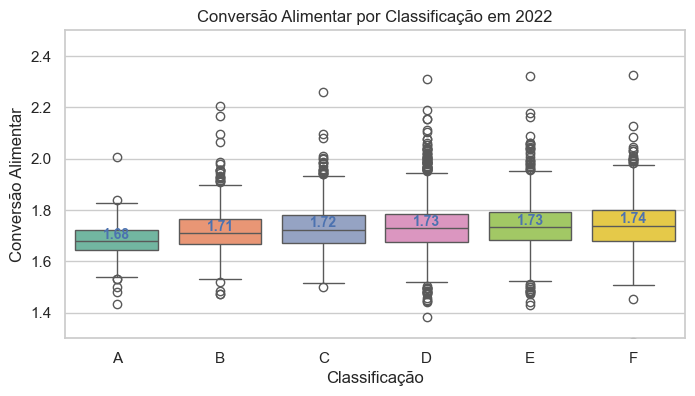

Estatísticas Descritivas da Conversão Alimentar por Classificação em 2022:
                      count      mean       std    min      25%    50%  \
CLASSIFICAÇÃO_LABEL                                                      
A                     267.0  1.681281  0.063674  1.432  1.64550  1.678   
B                     764.0  1.719679  0.082823  1.472  1.66800  1.710   
C                     881.0  1.731455  0.087294  1.263  1.67300  1.723   
D                    2028.0  1.735514  0.105781  1.382  1.67500  1.728   
E                    1294.0  1.740569  0.095006  1.431  1.68225  1.732   
F                     488.0  1.750145  0.113353  1.286  1.67850  1.738   

                         75%    max  
CLASSIFICAÇÃO_LABEL                  
A                    1.72050  2.005  
B                    1.76300  2.203  
C                    1.77900  2.258  
D                    1.78525  3.649  
E                    1.79075  2.566  
F                    1.79850  2.773  




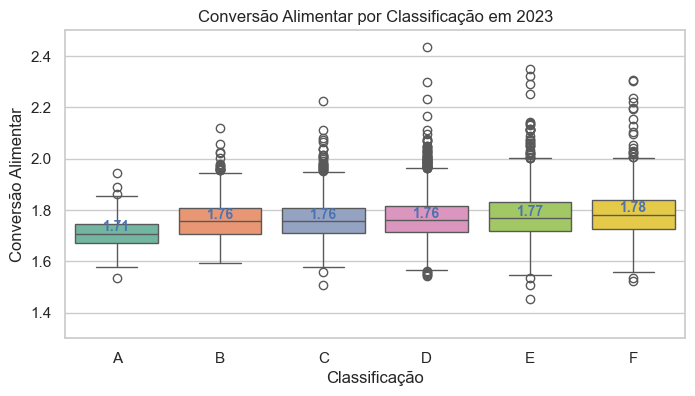

Estatísticas Descritivas da Conversão Alimentar por Classificação em 2023:
                      count       mean          std    min      25%     50%  \
CLASSIFICAÇÃO_LABEL                                                           
A                     314.0   1.709182     0.058528  1.536  1.67125  1.7070   
B                     864.0   1.760737     0.074827  1.592  1.70800  1.7550   
C                     988.0  75.128553  1660.821824  1.506  1.70875  1.7570   
D                    2022.0   1.771034     0.111382  1.541  1.71400  1.7600   
E                    1286.0   1.779351     0.096380  1.453  1.71600  1.7675   
F                     465.0   1.793880     0.112966  1.522  1.72600  1.7810   

                         75%        max  
CLASSIFICAÇÃO_LABEL                      
A                    1.74700      1.945  
B                    1.80600      2.119  
C                    1.80600  43348.225  
D                    1.81375      4.989  
E                    1.83075      2.350 

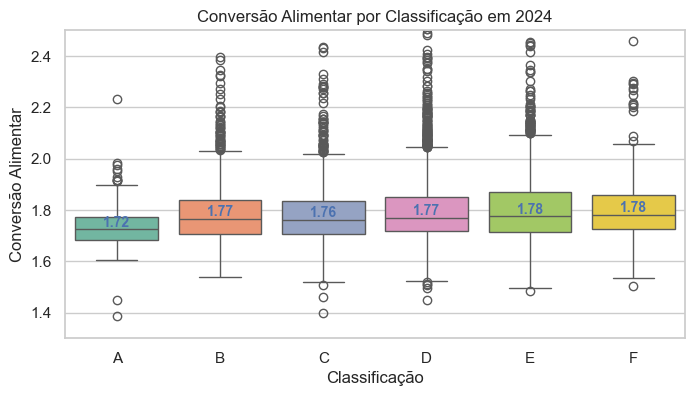

Estatísticas Descritivas da Conversão Alimentar por Classificação em 2024:
                      count       mean          std    min     25%    50%  \
CLASSIFICAÇÃO_LABEL                                                         
A                     307.0   1.735599     0.082686  1.387  1.6835  1.725   
B                    1031.0   1.788648     0.121268  1.537  1.7080  1.766   
C                    1182.0  65.573270  2192.952723  1.254  1.7080  1.762   
D                    2045.0   1.801049     0.138332  1.449  1.7170  1.770   
E                    1187.0   1.813334     0.172886  1.484  1.7155  1.775   
F                     404.0   1.807819     0.138644  1.504  1.7255  1.782   

                         75%        max  
CLASSIFICAÇÃO_LABEL                      
A                    1.77300      2.234  
B                    1.83700      2.396  
C                    1.83375  75396.000  
D                    1.84900      2.734  
E                    1.86800      4.041  
F             

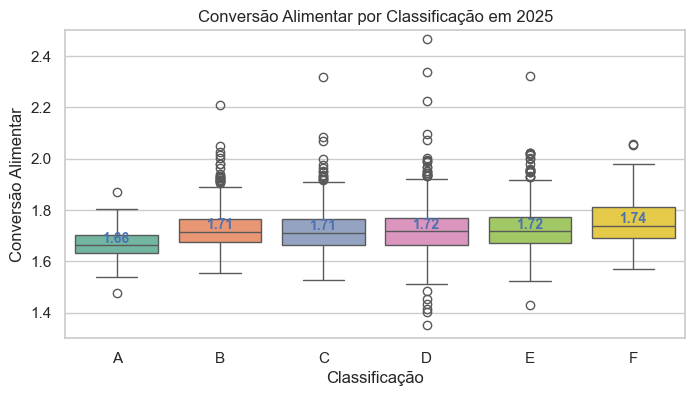

Estatísticas Descritivas da Conversão Alimentar por Classificação em 2025:
                     count      mean       std    min      25%     50%  \
CLASSIFICAÇÃO_LABEL                                                      
A                    152.0  1.665743  0.058761  1.478  1.63025  1.6620   
B                    472.0  1.728447  0.081356  1.553  1.67575  1.7145   
C                    573.0  1.721545  0.101034  1.527  1.66400  1.7110   
D                    983.0  1.723446  0.103882  1.352  1.66350  1.7160   
E                    547.0  1.728159  0.091460  1.431  1.67200  1.7160   
F                    185.0  1.756076  0.113509  1.571  1.69100  1.7390   

                         75%    max  
CLASSIFICAÇÃO_LABEL                  
A                    1.70250  1.871  
B                    1.76425  2.208  
C                    1.76400  2.704  
D                    1.76800  3.295  
E                    1.77200  2.322  
F                    1.81000  2.645  




In [205]:
# Boxplot por classificação e ano
# Mapping para converter os valores do eixo y
classificacao_mapping = {
    5: 'A',
    4: 'B',
    3: 'C',
    2: 'D',
    1: 'E',
    0: 'F'
}

anos = sorted(df['Ano'].unique()) #ordena os anos em ordem crescente
for ano in anos:
    plt.figure(figsize=(8, 4))
    
    # Aplica o mapping na coluna 'CLASSIFICAÇÃO'
    df_ano = df[df['Ano'] == ano].copy()
    df_ano['CLASSIFICAÇÃO_LABEL'] = df_ano['CLASSIFICAÇÃO'].map(classificacao_mapping)
    
    # Ordena os dados pela coluna 'CLASSIFICAÇÃO' para garantir a ordem correta no boxplot
    df_ano = df_ano.sort_values(by='CLASSIFICAÇÃO', ascending=True)
    
    sns.boxplot(x='CLASSIFICAÇÃO_LABEL', y='Conversão_Alimentar', data=df_ano, palette='Set2', order=list(classificacao_mapping.values()))
    plt.title(f'Conversão Alimentar por Classificação em {ano}')
    plt.ylim(1.3, 2.5)
    plt.xlabel('Classificação')  # Adiciona um rótulo para o eixo x
    plt.ylabel('Conversão Alimentar')  # Adiciona um rótulo para o eixo y
    
    medians = df_ano.groupby(['CLASSIFICAÇÃO_LABEL'])['Conversão_Alimentar'].median().values
    median_labels = [str(round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,median_labels):
        plt.text(pos[tick], medians[tick] + 0.01, median_labels[tick],  horizontalalignment='center',  size='small',  color='b', weight='semibold')
    
    plt.show()
    
    # Calcular estatísticas descritivas para cada classificação
    estatisticas_por_classificacao = df_ano.groupby('CLASSIFICAÇÃO_LABEL')['Conversão_Alimentar'].describe()
    print(f'Estatísticas Descritivas da Conversão Alimentar por Classificação em {ano}:')
    print(estatisticas_por_classificacao)
    print('\n')
    
   

## Análise de Outliers usando Método IQR (Intervalo Interquartil)

Esta célula realiza uma análise abrangente de outliers na variável "Conversão_Alimentar" utilizando o método do IQR para cada ano disponível no dataset. O processo inclui:

### Detecção de Outliers por Ano:
• **Cálculo do IQR**: Para cada ano, calcula-se Q1 (primeiro quartil), Q3 (terceiro quartil) e IQR = Q3 - Q1  
• **Limite Superior**: Define outliers como valores > Q3 + 1.5 × IQR  
• **Identificação**: Filtra registros que ultrapassam esse limite  

### Análise por Classificação de Aviário:
• **Mapeamento**: Aplica classificação A-F baseada nos valores numéricos (5=A, 4=B, 3=C, 2=D, 1=E, 0=F)  
• **Contagem**: Quantifica outliers em cada categoria de classificação  
• **Porcentagem**: Calcula a proporção de outliers em relação ao total de cada classificação  

### Visualizações Geradas:
• **Gráfico de Barras**: Probabilidade de um lote ser outlier por classificação e ano  
• **Heatmap**: Tendências temporais da probabilidade de outliers por classificação  
• **Análise Colorizada**: Usa gradiente azul-laranja-vermelho para destacar padrões de risco  

### Insights Principais:
• Aviários com classificação mais baixa (E, F) tendem a apresentar maior probabilidade de outliers  
• A análise temporal revela variações na qualidade da conversão alimentar ao longo dos anos  
• O método IQR fornece uma abordagem estatística robusta para identificação de desempenhos atípicos

In [206]:
from matplotlib.colors import LinearSegmentedColormap

# Identificar outliers (usando IQR)
anos = sorted(df['Ano'].unique())
for ano in anos:
    df_ano = df[df['Ano'] == ano].copy()
    Q1 = df_ano['Conversão_Alimentar'].quantile(0.25)
    Q3 = df_ano['Conversão_Alimentar'].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    # Contar outliers acima do limite superior
    outliers_acima = df_ano[df_ano['Conversão_Alimentar'] > limite_superior]
    
    # Aplica o mapping para criar a coluna 'CLASSIFICAÇÃO_LABEL'
    classificacao_mapping = {
        5: 'A',
        4: 'B',
        3: 'C',
        2: 'D',
        1: 'E',
        0: 'F'
    }
    
    df_ano['CLASSIFICAÇÃO_LABEL'] = df_ano['CLASSIFICAÇÃO'].map(classificacao_mapping)
    outliers_acima['CLASSIFICAÇÃO_LABEL'] = outliers_acima['CLASSIFICAÇÃO'].map(classificacao_mapping)
    
    # Agora podemos usar a coluna 'CLASSIFICAÇÃO_LABEL'
    # Calcular a quantidade de outliers por classificação
    contagem_outliers_por_classificacao = outliers_acima.groupby('CLASSIFICAÇÃO_LABEL')['Conversão_Alimentar'].count()
    
    # Calcular o total de amostras por classificação
    total_por_classificacao = df_ano.groupby('CLASSIFICAÇÃO_LABEL')['Conversão_Alimentar'].count()
    
    # Calcular a porcentagem de outliers por classificação
    porcentagem_outliers_por_classificacao = (contagem_outliers_por_classificacao / total_por_classificacao) * 100

    print(f'Quantidade de Outliers Acima por Classificação em {ano}:')
    print(contagem_outliers_por_classificacao)
    print('\n')
    
    print(f'Porcentagem de Outliers Acima por Classificação em {ano}:')
    print(porcentagem_outliers_por_classificacao)
    print('\n')


    

Quantidade de Outliers Acima por Classificação em 2022:
CLASSIFICAÇÃO_LABEL
A     1
B    11
C    17
D    57
E    36
F    22
Name: Conversão_Alimentar, dtype: int64


Porcentagem de Outliers Acima por Classificação em 2022:
CLASSIFICAÇÃO_LABEL
A    0.374532
B    1.439791
C    1.929625
D    2.810651
E    2.782071
F    4.508197
Name: Conversão_Alimentar, dtype: float64


Quantidade de Outliers Acima por Classificação em 2023:
CLASSIFICAÇÃO_LABEL
B     7
C    24
D    47
E    50
F    25
Name: Conversão_Alimentar, dtype: int64


Porcentagem de Outliers Acima por Classificação em 2023:
CLASSIFICAÇÃO_LABEL
A         NaN
B    0.810185
C    2.429150
D    2.324431
E    3.888025
F    5.376344
Name: Conversão_Alimentar, dtype: float64


Quantidade de Outliers Acima por Classificação em 2024:
CLASSIFICAÇÃO_LABEL
A      1
B     50
C     54
D    127
E    101
F     17
Name: Conversão_Alimentar, dtype: int64


Porcentagem de Outliers Acima por Classificação em 2024:
CLASSIFICAÇÃO_LABEL
A    0.325733
B  

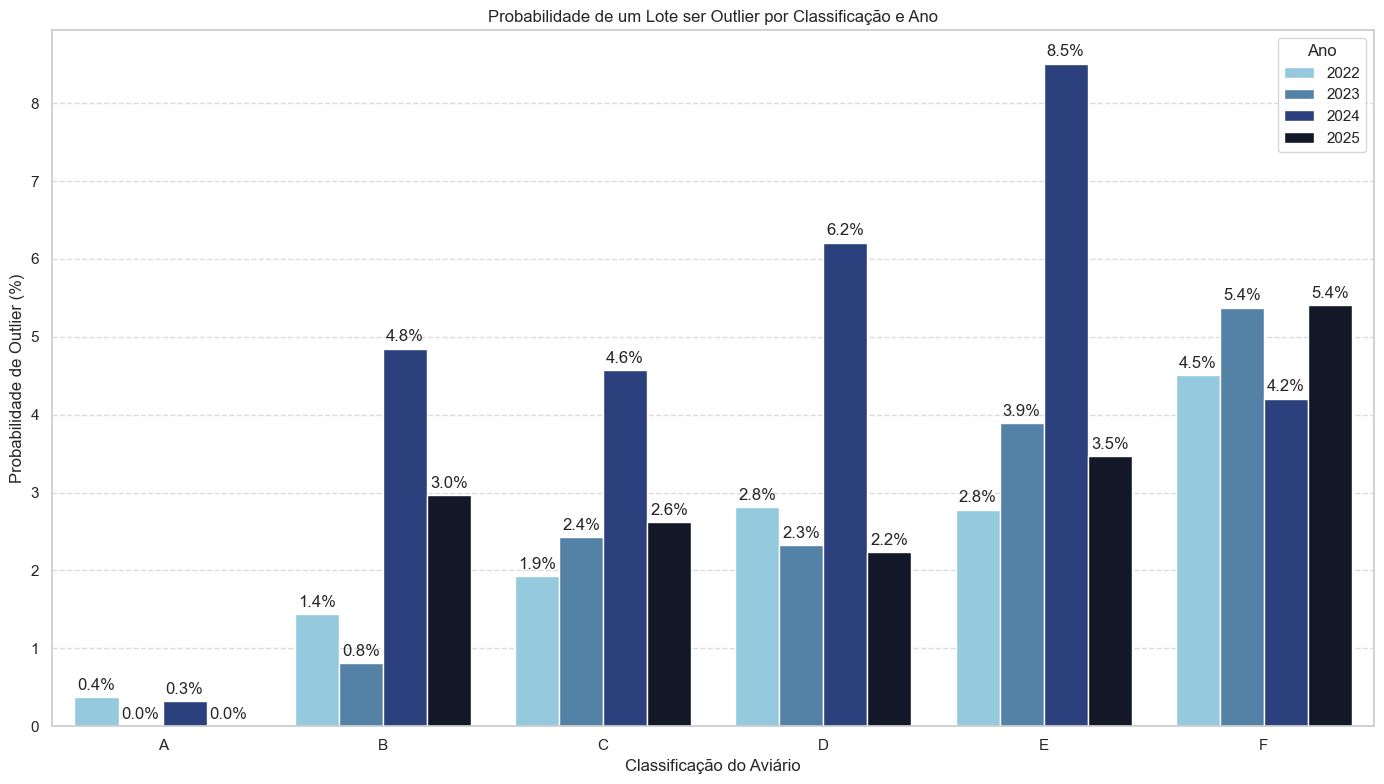

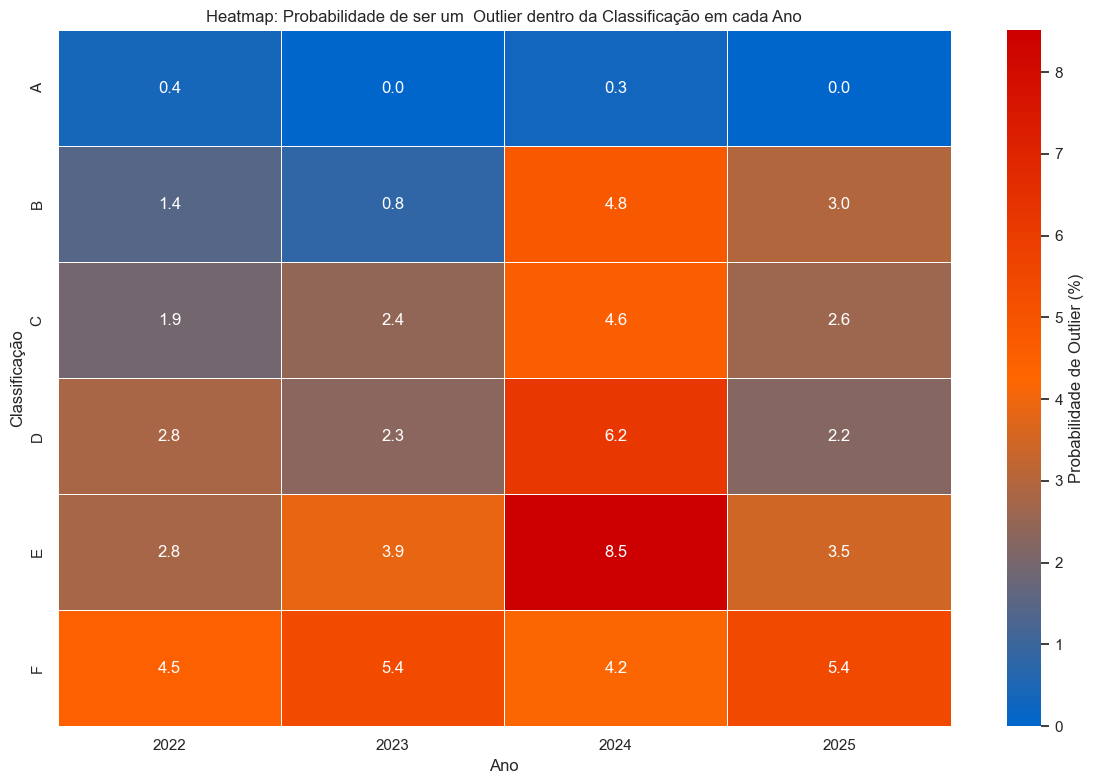

In [208]:
# Criar DataFrame para visualização dos outliers por classificação ao longo dos anos
outlier_data = []

# Coletar dados de outliers para todos os anos
for ano in anos:
    df_ano = df[df['Ano'] == ano].copy()
    
    # Aplicar o mapping para criar a coluna 'CLASSIFICAÇÃO_LABEL' se não existir
    if 'CLASSIFICAÇÃO_LABEL' not in df_ano.columns:
        df_ano['CLASSIFICAÇÃO_LABEL'] = df_ano['CLASSIFICAÇÃO'].map(classificacao_mapping)
        
    # Calcular IQR e limites
    Q1 = df_ano['Conversão_Alimentar'].quantile(0.25)
    Q3 = df_ano['Conversão_Alimentar'].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_ano[df_ano['Conversão_Alimentar'] > limite_superior]
    
    # Contar outliers por classificação
    outl_por_classe = outliers.groupby('CLASSIFICAÇÃO_LABEL')['Conversão_Alimentar'].count()
    
    # Contar total por classificação
    total_por_classe = df_ano.groupby('CLASSIFICAÇÃO_LABEL')['Conversão_Alimentar'].count()
    
    # Calcular probabilidade (%)
    for classe in classificacao_mapping.values():
        # Verificar se a classe existe nos dados
        outlier_count = outl_por_classe[classe] if classe in outl_por_classe else 0
        total_count = total_por_classe[classe] if classe in total_por_classe else 0
        prob = (outlier_count / total_count * 100) if total_count > 0 else 0
        
        outlier_data.append({
            'Ano': ano,
            'Classificação': classe,
            'Probabilidade (%)': prob
        })

# Criar DataFrame com os dados coletados
outlier_df = pd.DataFrame(outlier_data)

# Plotar gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Definir cores personalizadas: azul claro para anos mais antigos, azul escuro para mais recentes
cores_anos = ['#87CEEB', '#4682B4', '#1E3A8A', '#0F172A']  # Do azul claro ao azul escuro

sns.barplot(data=outlier_df, x='Classificação', y='Probabilidade (%)', hue='Ano', palette=cores_anos)

plt.title('Probabilidade de um Lote ser Outlier por Classificação e Ano')
plt.xlabel('Classificação do Aviário')
plt.ylabel('Probabilidade de Outlier (%)')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

# Criar heatmap para melhor visualização das tendências
plt.figure(figsize=(12, 8))
heatmap_data = outlier_df.pivot(index='Classificação', columns='Ano', values='Probabilidade (%)')

# Criar um colormap customizado: azul para valores baixos, laranja no meio, vermelho para valores altos
colors = ['#0066CC', '#FF6600', '#CC0000']  # Azul para 0, laranja para 0.5, vermelho para 1
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap=custom_cmap, linewidths=0.5, cbar_kws={'label': 'Probabilidade de Outlier (%)'})
plt.title('Heatmap: Probabilidade de ser um  Outlier dentro da Classificação em cada Ano')
plt.tight_layout()
plt.show()

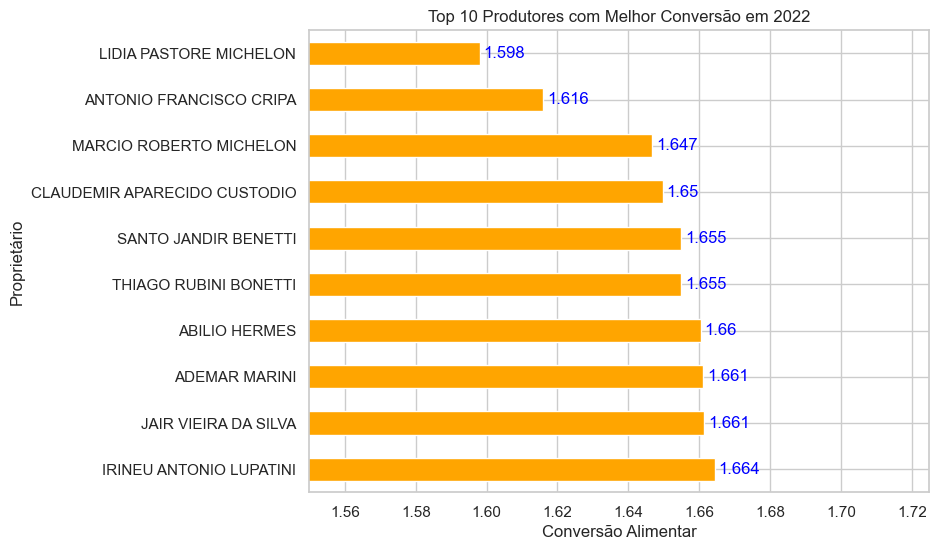

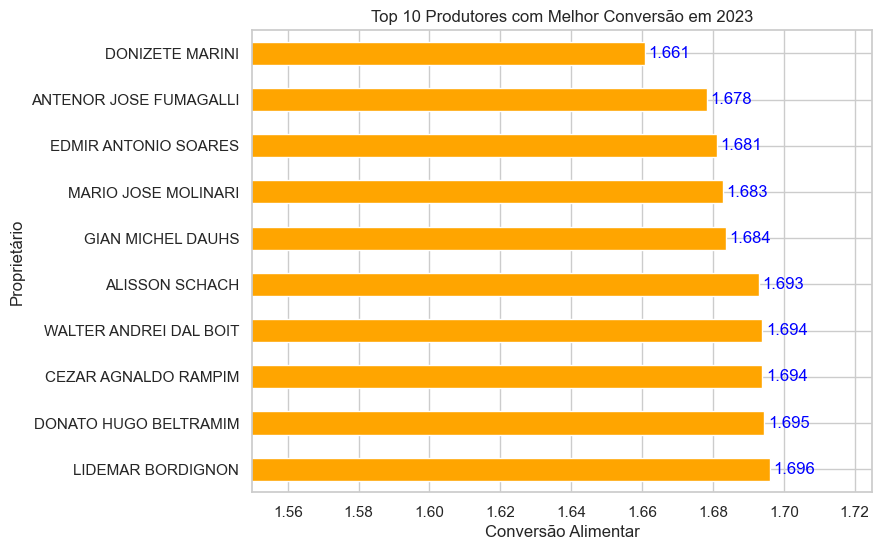

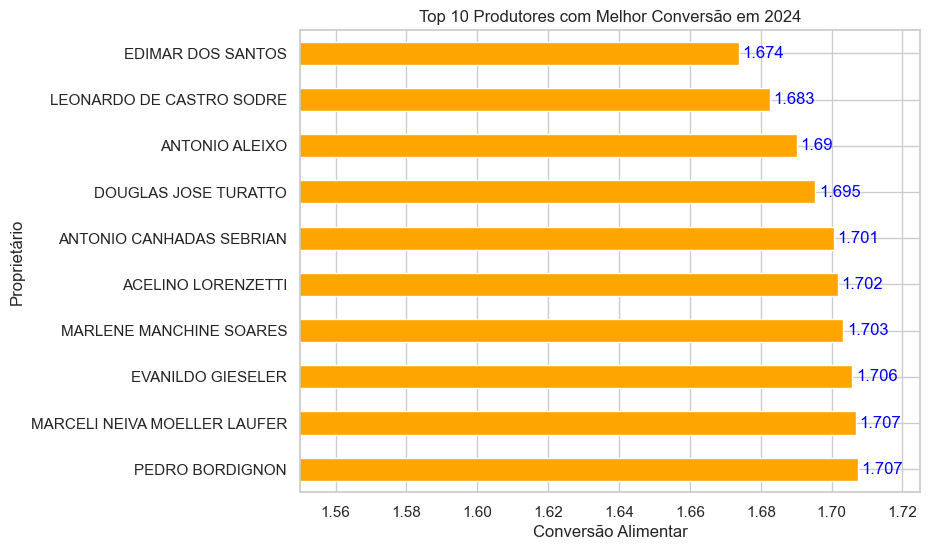

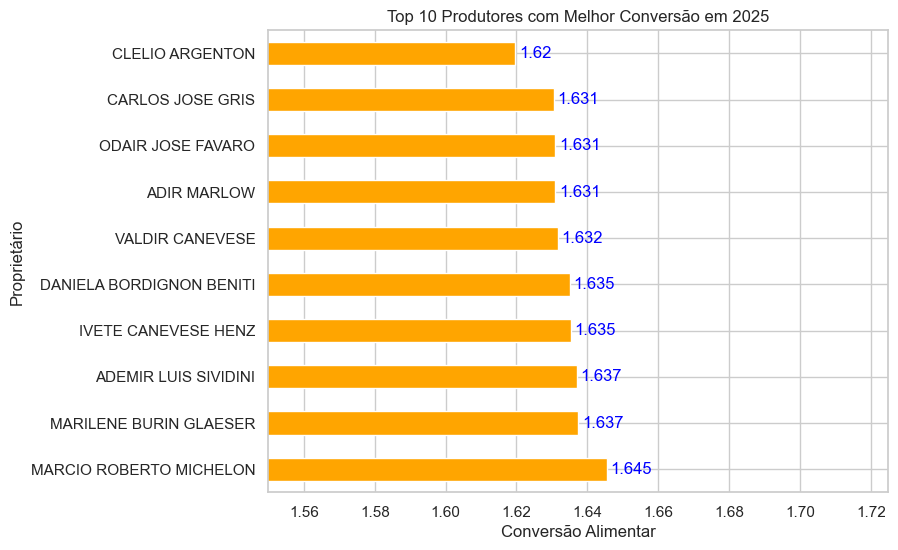

Estatísticas Descritivas da Conversão Alimentar por Ano:
       count       mean         std    min    25%    50%    75%        max
Ano                                                                       
2022  5722.0   1.732635    0.097790  1.263  1.673  1.724  1.781      3.649
2023  5939.0  13.973464  677.664562  1.453  1.710  1.758  1.815  43348.225
2024  6156.0  14.043285  960.923157  1.254  1.711  1.766  1.844  75396.000
2025  2912.0   1.723829    0.097621  1.352  1.666  1.713  1.767      3.295


In [209]:
# Top 10 produtores com melhor conversão alimentar por ano
anos = sorted(df['Ano'].unique())
for ano in anos:
    df_ano = df[df['Ano'] == ano]
    melhores = df_ano.groupby('Proprietario')['Conversão_Alimentar'].mean().sort_values().head(10)
    plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura para melhor visualização
    ax = melhores.plot(kind='barh', color='orange')
    plt.title(f'Top 10 Produtores com Melhor Conversão em {ano}')
    plt.xlabel('Conversão Alimentar')
    plt.ylabel('Proprietário')
    plt.xlim(1.55, 1.725)
    plt.gca().invert_yaxis()  # Inverte a ordem do eixo y
    
    # Adiciona rótulos de dados
    for i, v in enumerate(melhores):
        ax.text(v + 0.001, i, str(round(v, 3)), color='blue', va='center')

    plt.show()

# Estatísticas descritivas por ano
estatisticas_por_ano = df.groupby('Ano')['Conversão_Alimentar'].describe()
print('Estatísticas Descritivas da Conversão Alimentar por Ano:')
print(estatisticas_por_ano)

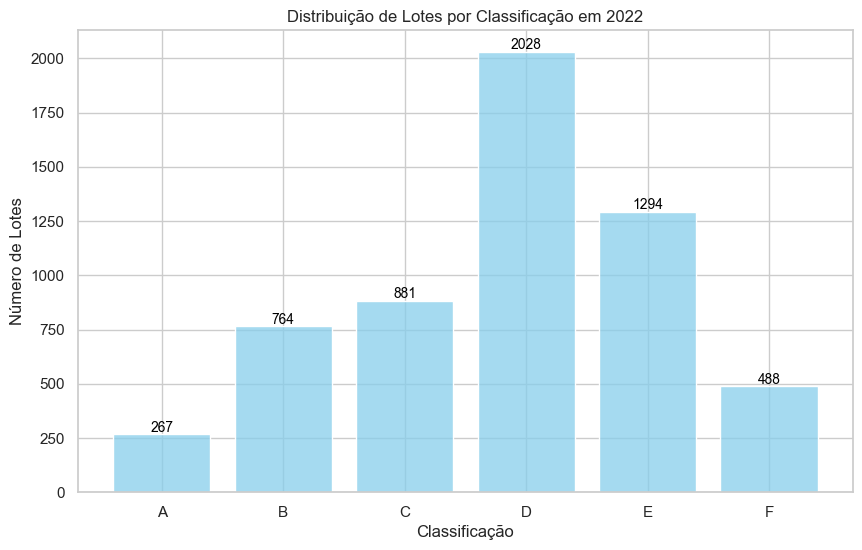

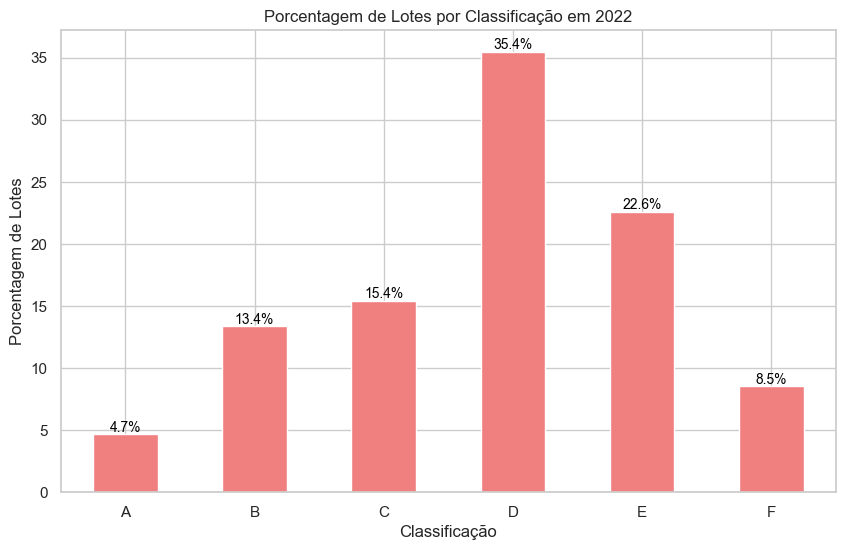

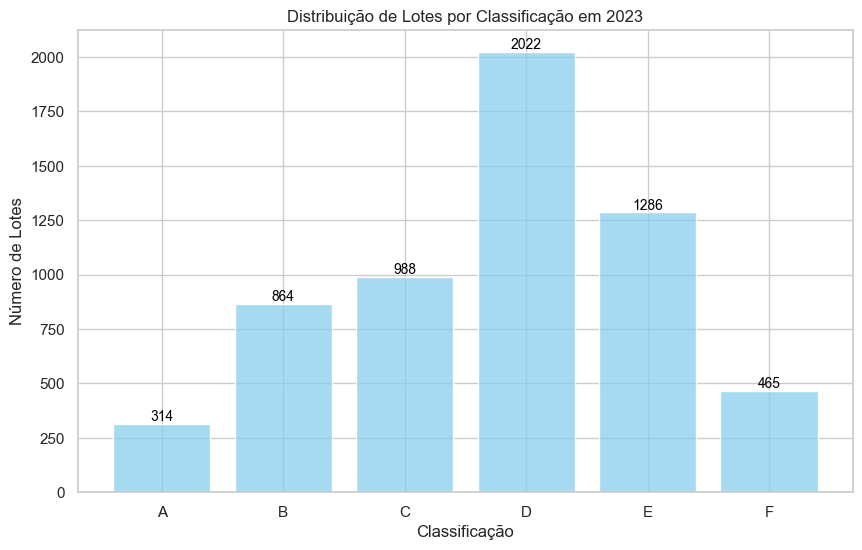

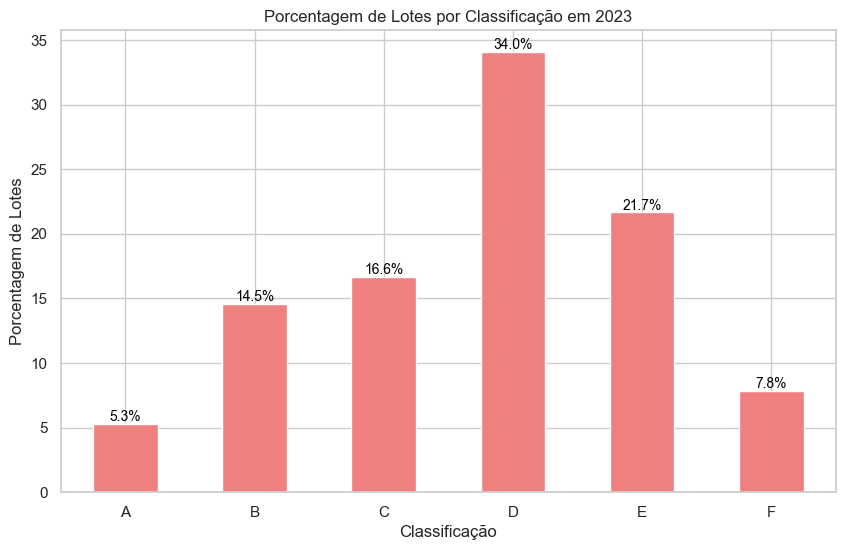

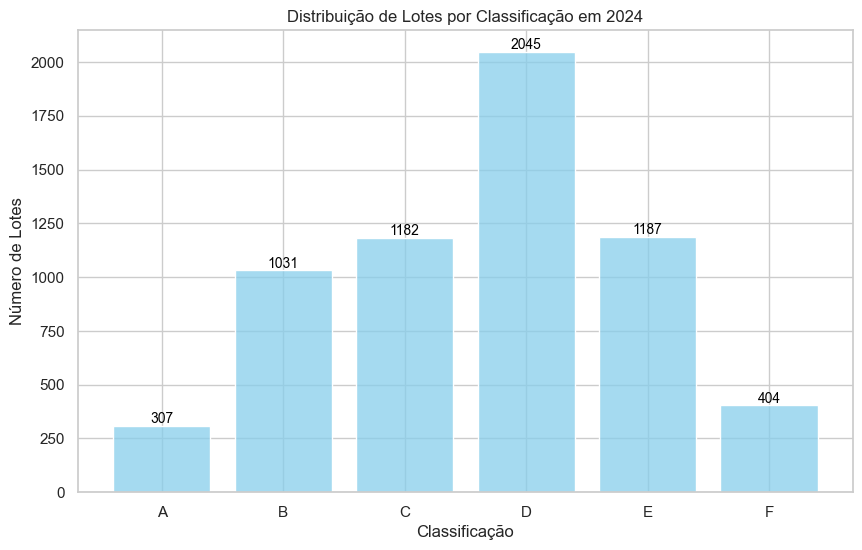

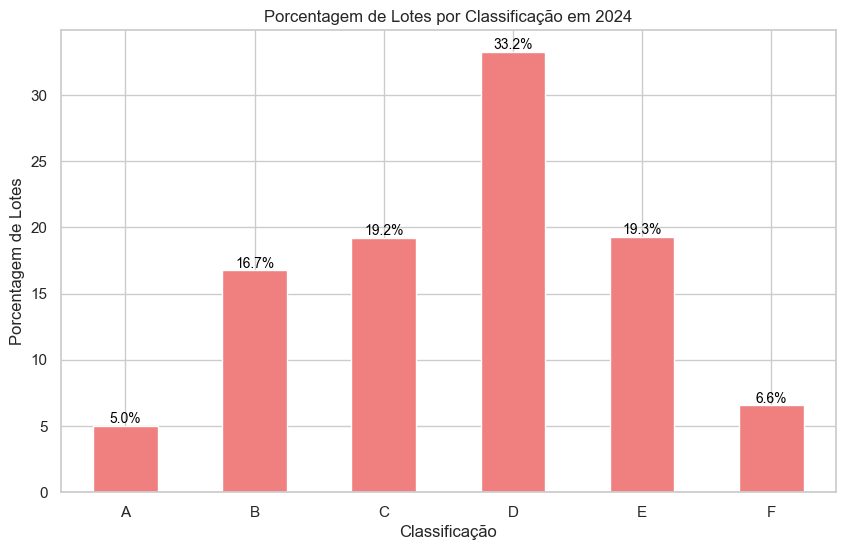

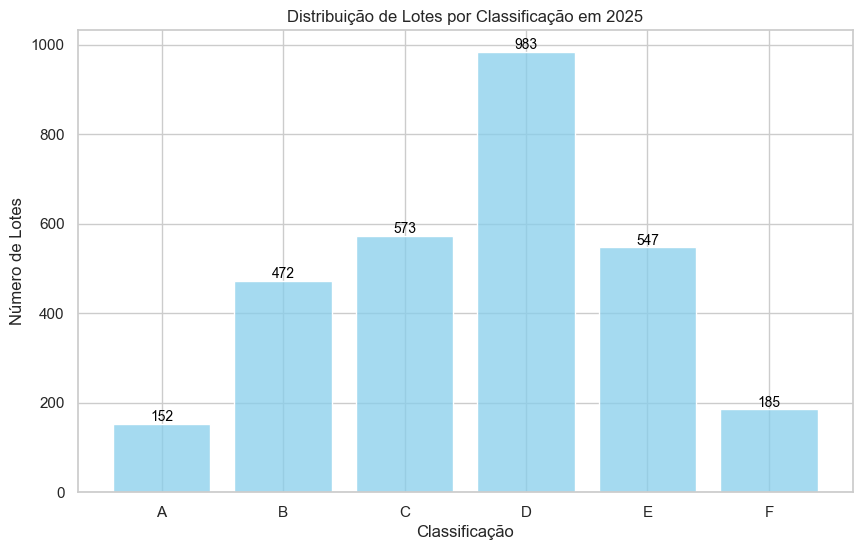

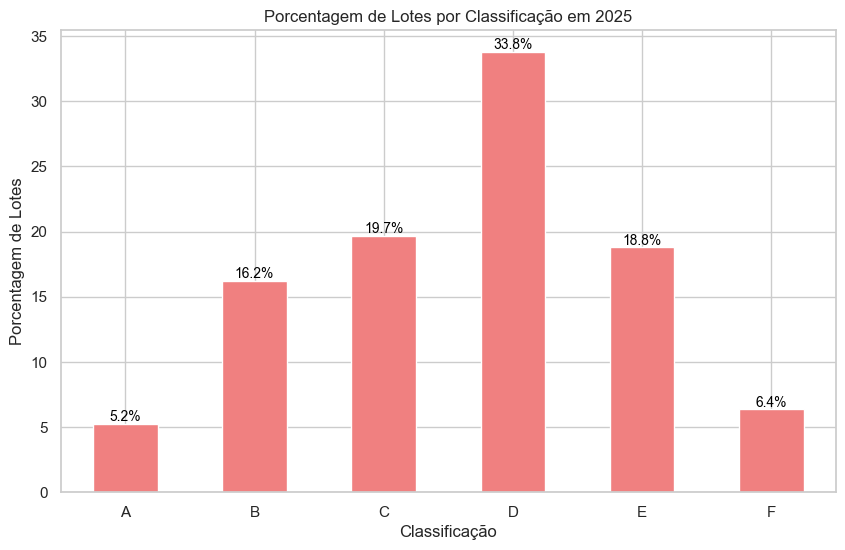

<Figure size 1200x600 with 0 Axes>

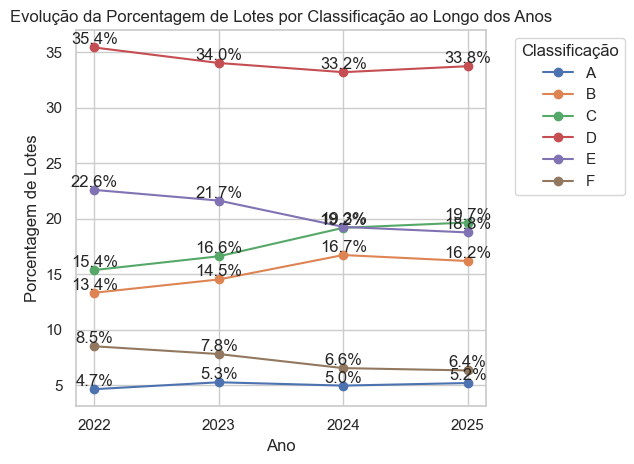

In [ ]:
anos = sorted(df['Ano'].unique())

for ano in anos:
    plt.figure(figsize=(10, 6))
    
    # Filtra o DataFrame para o ano atual
    df_ano = df[df['Ano'] == ano].copy()
    
    # Aplica o mapping para criar a coluna 'CLASSIFICAÇÃO_LABEL'
    df_ano['CLASSIFICAÇÃO_LABEL'] = df_ano['CLASSIFICAÇÃO'].map(classificacao_mapping)
    
    # Remove linhas onde 'CLASSIFICAÇÃO_LABEL' é NaN (se houver)
    df_ano = df_ano.dropna(subset=['CLASSIFICAÇÃO_LABEL'])

    # Ordena o DataFrame pela coluna 'CLASSIFICAÇÃO_LABEL' para garantir a ordem correta no histograma
    df_ano = df_ano.sort_values(by='CLASSIFICAÇÃO_LABEL', ascending=True)
    
    # Cria o histograma
    ax = sns.histplot(data=df_ano, x='CLASSIFICAÇÃO_LABEL', discrete=True, shrink=.8, color='skyblue')
    
    plt.title(f'Distribuição de Lotes por Classificação em {ano}')
    plt.xlabel('Classificação')
    plt.ylabel('Número de Lotes')
    #plt.gca().invert_xaxis()  # Remove a inversão do eixo x, pois a ordenação já está sendo feita
    
    # Adiciona rótulos de dados acima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()
    
    # Calcular a porcentagem de lotes em cada classificação
    total_lotes = len(df_ano)
    porcentagens = df_ano['CLASSIFICAÇÃO_LABEL'].value_counts(normalize=True) * 100
    porcentagens = porcentagens.sort_index(ascending=False)
    
    # Criar um gráfico de barras para as porcentagens
    plt.figure(figsize=(10, 6))
    ax = porcentagens.plot(kind='bar', color='lightcoral')
    
    plt.title(f'Porcentagem de Lotes por Classificação em {ano}')
    plt.xlabel('Classificação')
    plt.ylabel('Porcentagem de Lotes')
    plt.xticks(rotation=0)  # Garante que os rótulos do eixo x estejam horizontais
    plt.gca().invert_xaxis()
    
    # Adicionar rótulos de dados acima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()
    
# Evolução da porcentagem dos lotes em cada classificação na linha do tempo
# Garante que todas as classificações estejam presentes em cada ano
classificacoes_ordenadas = list(classificacao_mapping.values())
anos = sorted(df['Ano'].unique())

# Crie a coluna 'CLASSIFICAÇÃO_LABEL' antes de agrupar
df['CLASSIFICAÇÃO_LABEL'] = df['CLASSIFICAÇÃO'].map(classificacao_mapping)

index = pd.MultiIndex.from_product([anos, classificacoes_ordenadas], names=['Ano', 'CLASSIFICAÇÃO_LABEL'])

# Agrupa e unstack
evolucao_df = df.groupby(['Ano', 'CLASSIFICAÇÃO_LABEL']).size().reindex(index, fill_value=0).unstack(fill_value=0)

# Calcular a porcentagem em relação ao total de lotes por ano
evolucao_percentual = evolucao_df.div(evolucao_df.sum(axis=1), axis=0) * 100

# Ordenar as colunas de A a F
evolucao_percentual = evolucao_percentual.reindex(columns=classificacoes_ordenadas, fill_value=0)

# Plotar a evolução em um gráfico de linha
plt.figure(figsize=(12, 6))
ax = evolucao_percentual.plot(kind='line', marker='o')
plt.title('Evolução da Porcentagem de Lotes por Classificação ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Lotes')
plt.xticks(evolucao_percentual.index)
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para não cortar a legenda

# Adicionar rótulos de dados
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom')

plt.show()

Ranking Médio de Conversão Alimentar por Núcleo:
     Ranking_Medio Núcleo                                         Produtores
0            1.653    406                           [MARCEL GILVAN LEONARDI]
1            1.660    408                                     [CLAUCIR GRIS]
2            1.660    407                           [MARCEL GILVAN LEONARDI]
3            1.685      9    [EDMIR ANTONIO SOARES, MARLENE MANCHINE SOARES]
4            1.690    349                         [JUVENAL PEREIRA MONTEIRO]
..             ...    ...                                                ...
364          1.864     70                            [NIVALDO EDER DE SOUZA]
365          1.872     85                             [LIRI BOTTCHER MACIEL]
366          1.873    324                           [PAULO RENATO LOCATELLI]
367          1.877    261  [CLODOALDO SILVA DOS SANTOS, NICANOR SILVA DOS...
368          1.897    132                           [GUILIANO CARLOS GRINGS]

[369 rows x 3 columns]

Mé

<Figure size 1400x800 with 0 Axes>

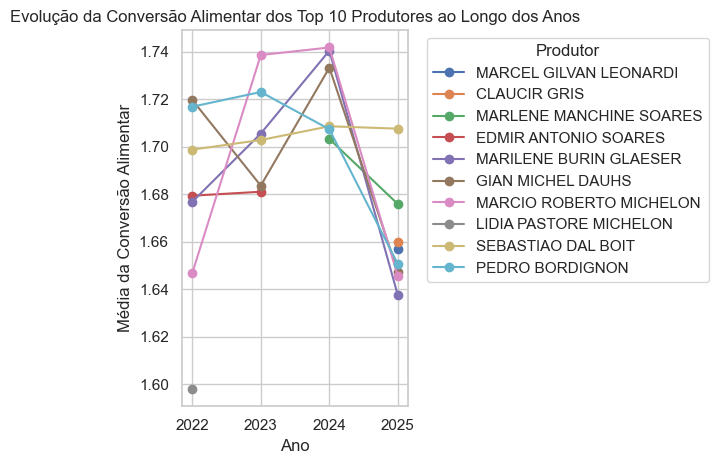

In [ ]:
# Consulta para obter todos os produtores distintos
query_produtores = "SELECT DISTINCT Proprietario FROM resultados WHERE Conversão_Alimentar <= 3 GROUP BY Fazenda;"

# Executar a consulta e obter a lista de produtores
produtores = pd.read_sql_query(query_produtores, conn)['Proprietario'].tolist()

# Filtrar o DataFrame para incluir apenas os dados com Conversão_Alimentar <= 3
df_filtrado = df[df['Conversão_Alimentar'] <= 3].copy()

# Calcular o ranking médio dos núcleos
ranking_por_nucleo = df_filtrado.groupby('Núcleo')['Conversão_Alimentar'].mean().sort_values()

# Criar um DataFrame com o ranking
df_ranking_nucleo = pd.DataFrame({'Ranking_Medio': ranking_por_nucleo.round(3)})
df_ranking_nucleo['Núcleo'] = df_ranking_nucleo.index

# Agrupar produtores por núcleo
produtores_por_nucleo = df_filtrado.groupby('Núcleo')['Proprietario'].unique().apply(list).to_dict()

# Adicionar a lista de produtores ao DataFrame
df_ranking_nucleo['Produtores'] = df_ranking_nucleo['Núcleo'].map(produtores_por_nucleo)

# Resetar o índice para que 'Núcleo' seja uma coluna
df_ranking_nucleo = df_ranking_nucleo.reset_index(drop=True)

# Exibir o DataFrame com o ranking médio e os produtores
print("Ranking Médio de Conversão Alimentar por Núcleo:")
print(df_ranking_nucleo)

# Explodir a coluna 'Produtores'
df_ranking_produtores = df_ranking_nucleo.explode('Produtores')

# Calcular a média do ranking para cada produtor
df_media_ranking = df_ranking_produtores.groupby('Produtores')['Ranking_Medio'].mean().sort_values().reset_index()
df_media_ranking.columns = ['Produtor', 'Média do Ranking']
df_media_ranking = df_media_ranking.set_index('Produtor')

print("\nMédia do Ranking por Produtor:")
print(df_media_ranking.round(3))

# Preparar os dados para o gráfico de linha
top_10_produtores = df_media_ranking.head(10)
produtores_lista = top_10_produtores.index.tolist()

# Filtrar o DataFrame original para incluir apenas os top 10 produtores
df_top_10 = df[df['Proprietario'].isin(produtores_lista)].copy()

# Calcular a média da conversão alimentar por produtor e ano
df_media_por_ano = df_top_10.groupby(['Ano', 'Proprietario'])['Conversão_Alimentar'].mean().unstack()

# Ordenar as colunas com base no ranking médio geral
df_media_por_ano = df_media_por_ano[produtores_lista]

# Plotar a evolução da conversão alimentar ao longo dos anos
plt.figure(figsize=(14, 8))
df_media_por_ano.plot(marker='o')
plt.title('Evolução da Conversão Alimentar dos Top 10 Produtores ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média da Conversão Alimentar')
plt.xticks(df_media_por_ano.index)
plt.legend(title='Produtor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusões

A análise exploratória dos dados de conversão alimentar por núcleo e aviário revelou insights importantes sobre o desempenho dos sistemas produtivos avícolas:

### Desempenho por Classificação de Aviário

Os resultados demonstram uma **correlação inversa** entre a classificação dos aviários e a eficiência da conversão alimentar. Aviários com classificação superior (A e B) apresentam consistentemente melhores índices de conversão, enquanto aqueles com classificações inferiores (E e F) mostram maior variabilidade e piores resultados médios.

### Identificação de Outliers

A análise de outliers utilizando o método IQR revelou que:
- **Aviários classe F** apresentam a maior probabilidade de lotes outliers (≈5,4% em 2025)
- **Aviários classe A** demonstram maior estabilidade, com menor incidência de outliers
- Existe uma tendência temporal de melhoria geral, com redução gradual da ocorrência de outliers em classificações superiores

### Evolução Temporal

O período analisado (2022-2025) mostra:
- **Estabilização** da distribuição de lotes por classificação
- **Manutenção** da predominância de aviários classe D (≈34% dos lotes)
- **Redução progressiva** de aviários com classificações extremas (A e F)

### Produtores de Destaque

A identificação dos top 10 produtores com melhor conversão alimentar evidenciou:
- **Consistência** de desempenho ao longo dos anos
- Média de conversão alimentar entre **1,656 e 1,707**
- Capacidade de manutenção de padrões elevados independentemente das variações temporais

### Implicações Práticas

Os resultados sugerem que investimentos em infraestrutura de aviários (aquecimento, resfriamento, isolamento e ventilação) são fundamentais para:
- Reduzir a variabilidade na conversão alimentar
- Minimizar a ocorrência de lotes com desempenho atípico
- Garantir maior previsibilidade produtiva

Esta análise fornece uma base sólida para tomadas de decisão relacionadas a melhorias de infraestrutura e seleção de produtores, contribuindo para a otimização da eficiência produtiva no setor avícola.